In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [34]:
wine = pd.read_csv('../../DATA/wine_fraud.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [35]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


<Axes: xlabel='quality', ylabel='count'>

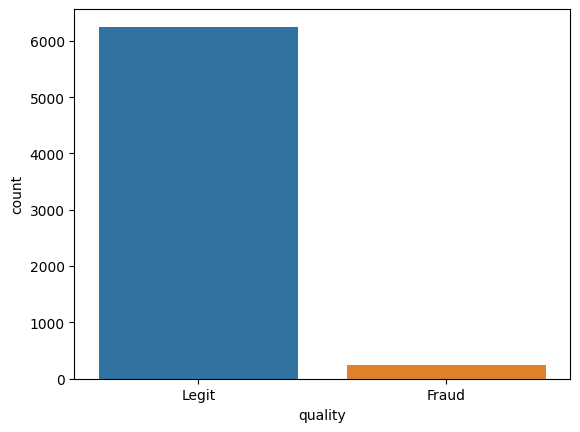

In [36]:
sns.countplot(data=wine,x='quality')

<Axes: xlabel='type', ylabel='count'>

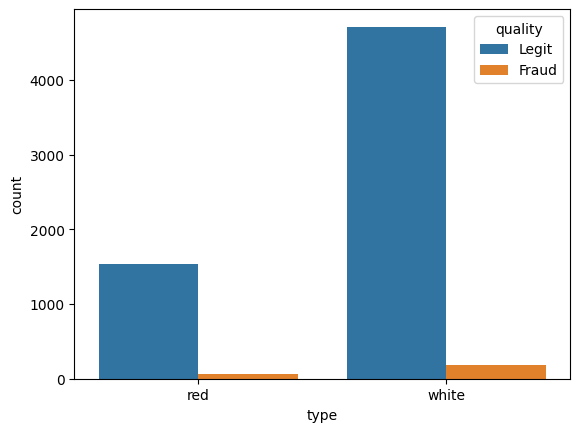

In [37]:
sns.countplot(data=wine,x='type',hue='quality')

In [38]:
wine['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

In [39]:
reds = wine[wine['type'] == 'red']
whites = wine[wine['type'] == 'white']

In [40]:
round(100 * len(reds[reds['quality'] == 'Fraud']) / len(reds),2)

3.94

In [41]:
round(100 * len(whites[whites['quality'] == 'Fraud']) / len(whites),2)

3.74

C:\Users\HP\AppData\Local\Temp\ipykernel_12248\1761086825.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine.corr()['Fraud'][:-1].sort_values().plot(kind='bar')


<Axes: >

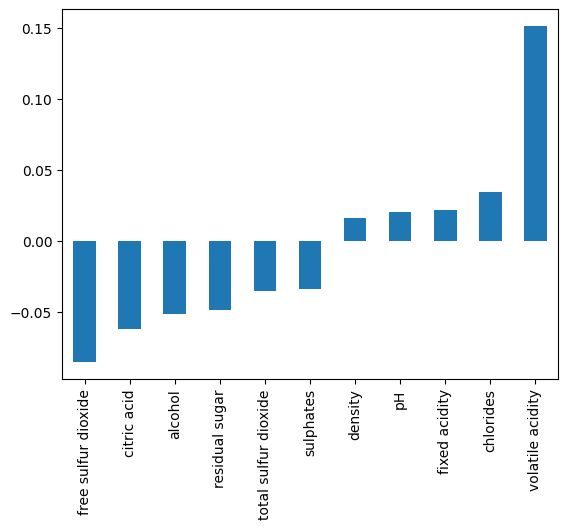

In [42]:
wine['Fraud'] = wine['quality'].map({'Legit':0,'Fraud':1})
wine.corr()['Fraud'][:-1].sort_values().plot(kind='bar')

C:\Users\HP\AppData\Local\Temp\ipykernel_12248\240558297.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(wine.corr(),cmap='viridis')


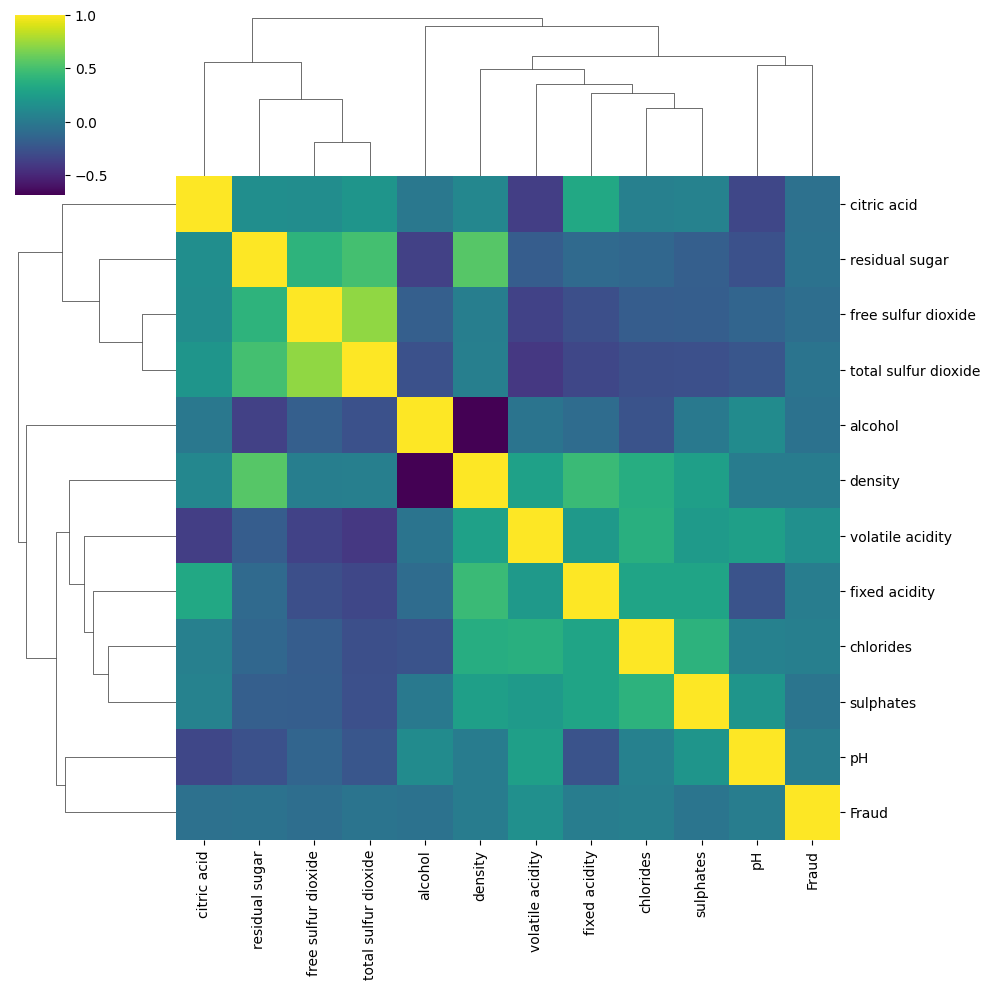

In [43]:
sns.clustermap(wine.corr(),cmap='viridis')

C:\Users\HP\AppData\Local\Temp\ipykernel_12248\3814960414.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine.corr(),annot=True,cmap='viridis')


<Axes: >

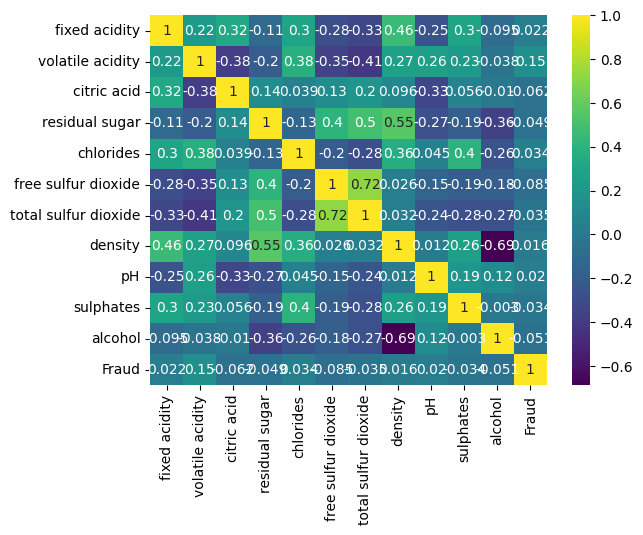

In [44]:
# wine.corr().values
sns.heatmap(wine.corr(),annot=True,cmap='viridis')

In [47]:
wine['type'] = pd.get_dummies(wine['type'],drop_first=True)
wine['type']

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: type, Length: 6497, dtype: uint8

In [45]:
wine = wine.drop('Fraud',axis=1)

In [48]:
X = wine.drop('quality',axis=1)
y = wine['quality']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [54]:
from sklearn.svm import SVC

In [55]:
svc = SVC(class_weight='balanced')

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1,2,5,10,15,20,100]}

In [58]:
grid = GridSearchCV(svc,param_grid)

In [60]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 15, 20,
                               100]})

In [61]:
grid.best_params_

{'C': 100}

In [62]:
from sklearn.metrics import confusion_matrix,mean_absolute_error,mean_squared_error,classification_report

In [63]:
grid_pred = grid.predict(scaled_X_test)
grid_pred

array(['Legit', 'Fraud', 'Legit', 'Legit', 'Legit', 'Legit', 'Fraud',
       'Legit', 'Fraud', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit', 'Fraud',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Fraud', 'Legit',
       'Legit', 'Fraud', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Fraud',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Leg

In [64]:
confusion_matrix(y_test,grid_pred)

array([[  7,  20],
       [ 28, 595]], dtype=int64)

In [65]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

       Fraud       0.20      0.26      0.23        27
       Legit       0.97      0.96      0.96       623

    accuracy                           0.93       650
   macro avg       0.58      0.61      0.59       650
weighted avg       0.94      0.93      0.93       650



In [67]:
# mean_absolute_error(y_test,grid_pred)
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_test,grid_pred)

0.9261538461538461